<a href="https://colab.research.google.com/github/m-a-diganta/Diamond-Price-Prediction-using-Machine-Learning/blob/main/Project_Diamond_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

Library Import


In [ ]:
!pip install lime
!pip install eli5

from IPython.display import clear_output
clear_output()

In [ ]:
import pandas as pd
import numpy as np

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

#XAI
import lime
import lime.lime_tabular

import eli5
from eli5.sklearn import PermutationImportance

Dataset Import


In [ ]:
!git clone https://github.com/m-a-diganta/Diamond-Price-Prediction-using-Machine-Learning

Cloning into 'Diamond-Price-Prediction-using-Machine-Learning'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 688.30 KiB | 15.29 MiB/s, done.


# Preprocessing

In [ ]:
df = pd.read_csv('/content/Diamond-Price-Prediction-using-Machine-Learning/Diamonds Prices2022.csv')

In [ ]:
# Null check
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.shape

(53943, 11)

In [ ]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
# Dropping Unnecessary column
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
# One hot encoding
df = pd.get_dummies(df, columns=['color', 'clarity', 'cut'], drop_first=True)

In [ ]:
df

,carat,depth,table,price,x,y,z,color_E,color_F,color_G,...,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,61.5,55.0,326,3.95,3.98,2.43,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,True,False,False,...,True,False,False,False,False,False,False,False,True,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,True,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,False,False,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,False,...,False,True,False,False,False,False,False,False,True,False
53939,0.75,62.2,55.0,2757,5.83,5.87,3.64,False,False,False,...,False,True,False,False,False,False,False,True,False,False
53940,0.71,60.5,55.0,2756,5.79,5.74,3.49,True,False,False,...,True,False,False,False,False,False,False,False,True,False
53941,0.71,59.8,62.0,2756,5.74,5.73,3.43,False,True,False,...,True,False,False,False,False,False,False,False,True,False


<Axes: >

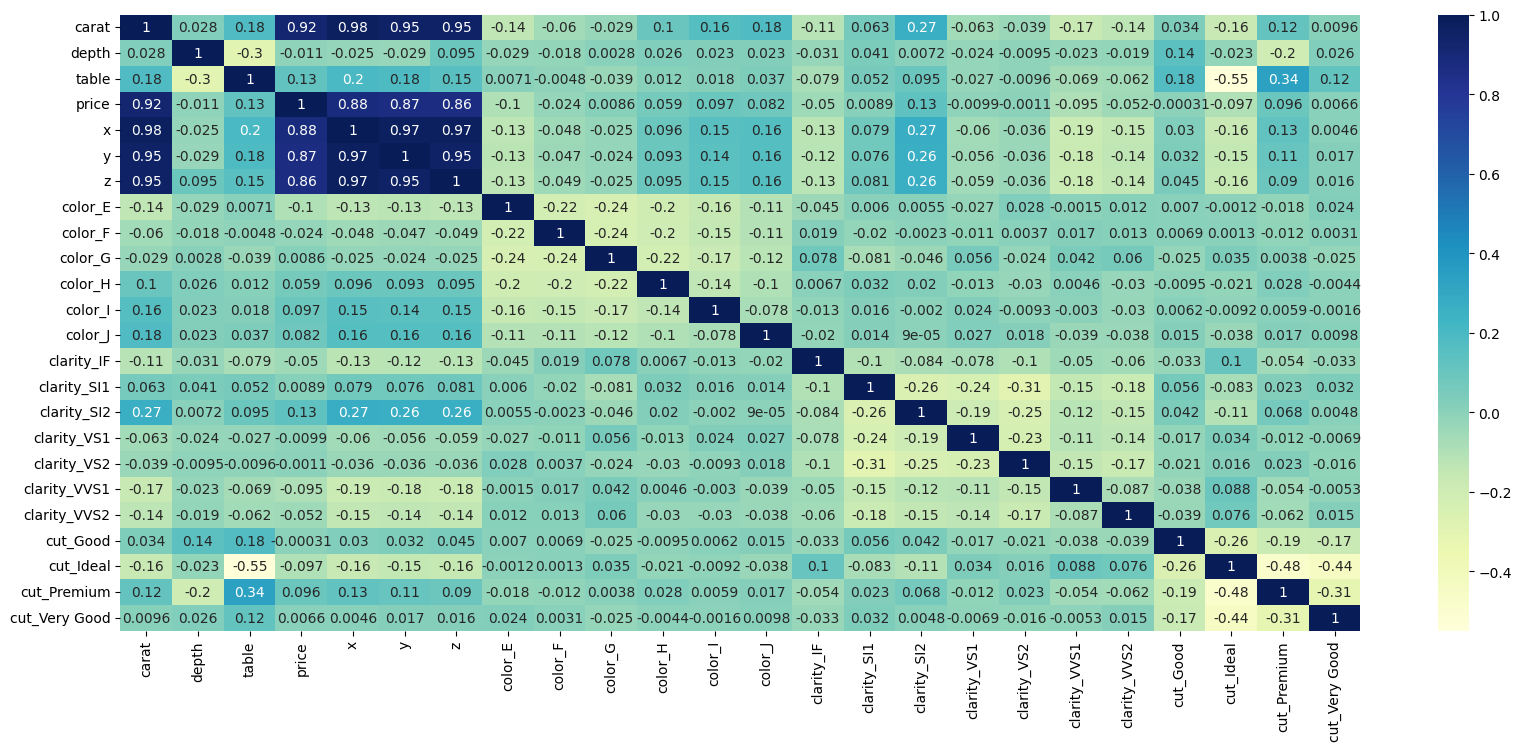

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [ ]:
X = df.drop('price', axis=1)            # Features
Y = df['price']                         # Label / Class

In [ ]:
feature_names = X.columns.tolist()
label_names = Y.unique().tolist()

feature_count = len(feature_names)
label_count = len(label_names)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', Y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', Y_test.shape)

Training Features Shape: (37760, 23)
Training Labels Shape: (37760,)
Testing Features Shape: (16183, 23)
Testing Labels Shape: (16183,)


# Model Testing

In [ ]:
scores = {}

In [ ]:
# Linear Regression
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)

model_LR.score(X_test, Y_test)
scores['Linear Regression'] = model_LR.score(X_test, Y_test)

In [ ]:
# Decision Tree Regression
model_DTR = DecisionTreeRegressor()
model_DTR.fit(X_train, Y_train)

model_DTR.score(X_test, Y_test)
scores['Decision Tree Regression'] = model_DTR.score(X_test, Y_test)

In [ ]:
# Random Forest Regression
model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, Y_train)

model_RFR.score(X_test, Y_test)
scores['Random Forest Regression'] = model_RFR.score(X_test, Y_test)

In [ ]:
# Gradient Boosting Regression
model_GBR = GradientBoostingRegressor()
model_GBR.fit(X_train, Y_train)

model_GBR.score(X_test, Y_test)
scores['Gradient Boosting Regression'] = model_GBR.score(X_test, Y_test)

In [ ]:
# Support Vector Regression (SVR)
model_SVR = SVR()
model_SVR.fit(X_train, Y_train)

model_SVR.score(X_test, Y_test)
scores['SVR'] = model_SVR.score(X_test, Y_test)

In [ ]:
# K-Nearest Neighbors (KNN)
model_KNN = KNeighborsRegressor()
model_KNN.fit(X_train, Y_train)

model_KNN.score(X_test, Y_test)
scores['KNN'] = model_KNN.score(X_test, Y_test)

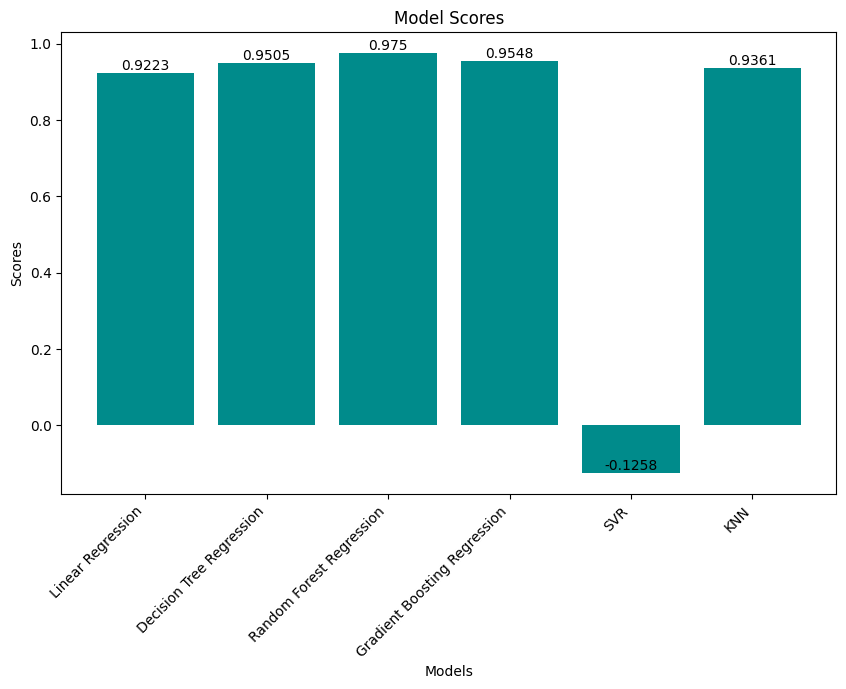

In [ ]:
# Model Comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(scores.keys(), scores.values(), color='darkcyan')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Scores')
plt.xticks(rotation=45, ha='right')

# Display y-axis values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()

# Model: RandomForestRegressor

In [ ]:
model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
model_RFR.score(X_test, Y_test)

0.9747045738030546

In [ ]:
Y_pred = model_RFR.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {mse**.5}")

Mean Squared Error: 391572.43924190325
Root Mean Squared Error: 625.7574923577849


In [ ]:
checker = {'Actual Price': Y_test[:20], 'Predicted Price': Y_pred[:20]}
checker = pd.DataFrame(checker)

checker

,Actual Price,Predicted Price
1388,559,555.28
19841,8403,8445.17
41647,1238,1275.11
41741,1243,1211.03
17244,6901,9863.09
1608,3011,4016.54
46401,1766,1705.31
24625,12958,11729.50
49388,2103,2005.70
10460,4789,5726.82


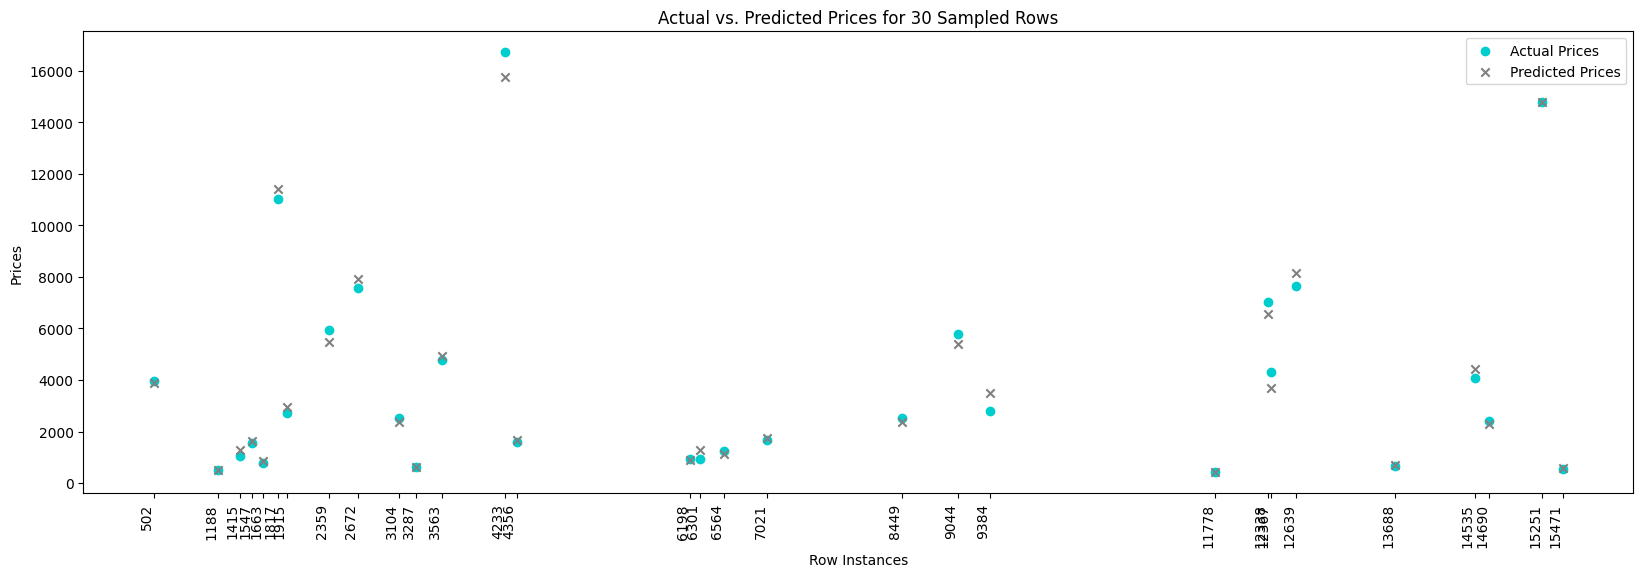

In [ ]:
# Randomly sample a subset of rows for visualization
sample_size = 30
random_indices = np.random.choice(len(X_test), size=sample_size, replace=False)

# Scatter plot for the sampled rows showing actual and predicted prices
sampled_rows = X_test.iloc[random_indices]
sampled_actual_prices = Y_test.iloc[random_indices]
sampled_predicted_prices = Y_pred[random_indices]

plt.figure(figsize=(20, 6))

plt.scatter(random_indices, sampled_actual_prices, color='#00CDCD', label='Actual Prices', marker='o')
plt.scatter(random_indices, sampled_predicted_prices, color='gray', label='Predicted Prices', marker='x')

plt.xlabel('Row Instances')
plt.ylabel('Prices')
plt.title(f'Actual vs. Predicted Prices for {sample_size} Sampled Rows')
plt.xticks(random_indices, [f'{i+1}' for i in random_indices],rotation=90, horizontalalignment='right')
plt.legend()

plt.show()

In [ ]:
count_below_8000 = len(df[df['price'] < 8000])
total_count = len(df)

print(f"Total Rows: {total_count}")
print(f"Count of rows < 8000: {count_below_8000}")

print((count_below_8000/total_count)*100)

Total Rows: 53943
Count of rows < 8000: 46337
85.89993140907995


In [ ]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

model_RFR = RandomForestRegressor()

param_grid = {
    'n_estimators': [350],
    'max_features': [18],
    # 'min_samples_split': [2, 4, 6, 8]
}

grid_search = GridSearchCV(model_RFR, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [18], 'n_estimators': [350]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=18, n_estimators=350)

In [ ]:
grid_search.best_estimator_.score(X_test, Y_test)

0.9755734482086512

In [ ]:
# feature_count

# XAI: LIME (Local)

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names = feature_names,
    class_names = label_names,
    mode='regression'
)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming you've initialized the RandomForestRegressor model
model_RFR = RandomForestRegressor()

# Fit the model with training data
model_RFR.fit(X_train, Y_train)

# Once the model is fitted, proceed with explanations
exp = explainer.explain_instance(
    X_test.iloc[19],
    model_RFR.predict,
    num_features=feature_count
)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
exp

In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
print(sum([x[1] for x in exp.as_list() ]))

2968.8265121969507


# XAI: ELI5 (Global)

In [ ]:
perm = PermutationImportance(model_RFR, random_state=7).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names=feature_names, top=30)

Weight,Feature
1.0696 ± 0.0187,carat
0.3441 ± 0.0054,y
0.0696 ± 0.0049,clarity_SI2
0.0532 ± 0.0041,clarity_SI1
0.0413 ± 0.0016,color_J
0.0405 ± 0.0021,clarity_VS2
0.0351 ± 0.0021,clarity_VVS2
0.0336 ± 0.0016,color_I
0.0331 ± 0.0013,clarity_VS1
0.0231 ± 0.0016,color_H
